<a href="https://colab.research.google.com/github/Ramon689/Python-for-Data-Science/blob/master/Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0.2        320 non-null    int64  
 1   Unnamed: 0.1        320 non-null    int64  
 2   Unnamed: 0          320 non-null    int64  
 3   District_Key        320 non-null    object 
 4   Year_End            320 non-null    int64  
 5   Assessment          320 non-null    object 
 6   Population          320 non-null    object 
 7   Total_Tested        320 non-null    int64  
 8   Total_Proficient    320 non-null    float64
 9   Percent_Proficient  320 non-null    float64
 10  Agency_Name         320 non-null    object 
 11  County              320 non-null    object 
 12  City                320 non-null    object 
 13  Zip                 320 non-null    int64  
 14  Latitude            320 non-null    float64
 15  Longitude           320 non-null    float64
 16  Avg_Tot_

In [ ]:
df.head()


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,District_Key,Year_End,Assessment,Population,Total_Tested,Total_Proficient,Percent_Proficient,Agency_Name,County,City,Zip,Latitude,Longitude,Avg_Tot_Cur_Exp,Avg_Tot_Exp,Race,Area
0,0,0,6,ALLEGAN AREA EDUCATIONAL SERVICE AGENCY,2011,MEAP,WHITE,951,264.378,0.278,ALLEGAN AREA EDUCATIONAL SERVICE AGENCY,ALLEGAN COUNTY,ALLEGAN,49010,42.517,-85.861,9545.888889,11188.88889,0,Urban
1,1,3,2581,BAY-ARENAC ISD,2011,MEAP,WHITE,1109,261.724,0.236,AU GRES-SIMS SCHOOL DISTRICT,ARENAC COUNTY,AU GRES,48703,44.040,-83.696,8482.250000,9302.37500,0,Rural
2,2,4,4321,BERRIEN RESA,2011,MEAP,WHITE,1258,446.590,0.355,BENTON HARBOR AREA SCHOOLS,BERRIEN COUNTY,BENTON HARBOR,49022,42.105,-86.464,9630.444444,11279.55556,0,Urban
3,3,5,11137,BRANCH ISD,2011,MEAP,WHITE,356,96.832,0.272,BRANCH ISD,BRANCH COUNTY,COLDWATER,49036,41.950,-84.996,7620.250000,8236.75000,0,Rural
4,4,7,12841,CALHOUN INTERMEDIATE SCHOOL DISTRICT,2011,MEAP,WHITE,1325,398.825,0.301,ALANSON PUBLIC SCHOOLS,EMMET COUNTY,ALANSON,49706,45.444,-84.789,11068.142860,12270.07143,0,Rural


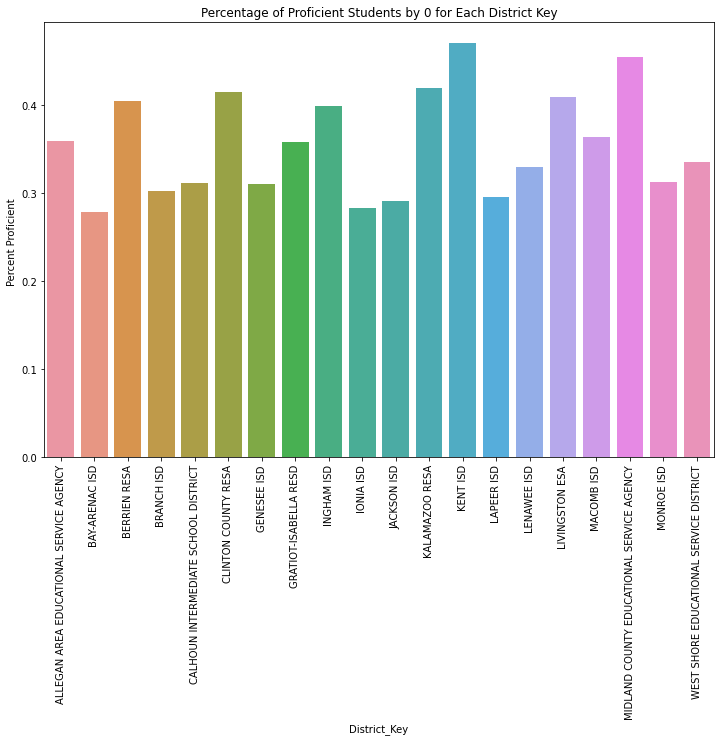

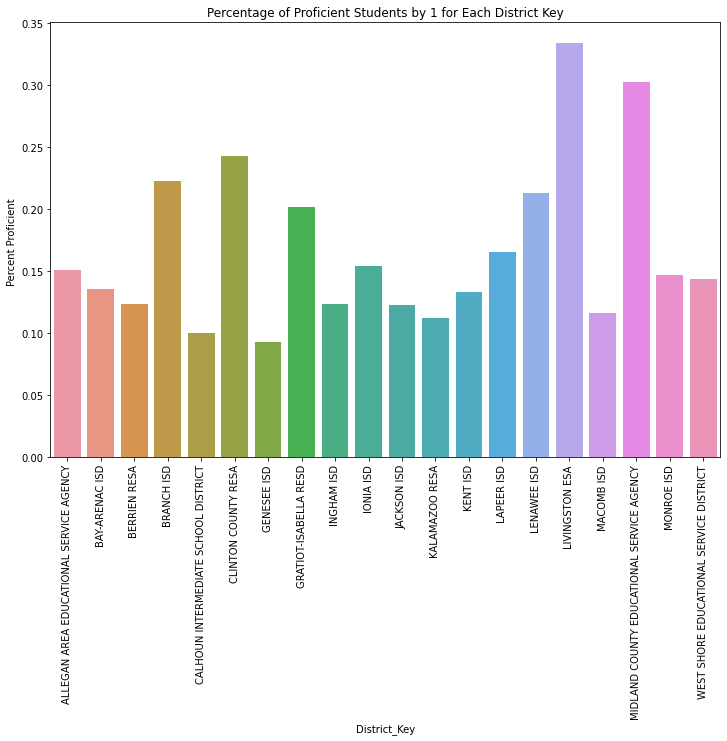

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/cc_race_20d_U.csv')

# create a pivot table to summarize the data
df_pivot = df.pivot_table(index='District_Key', columns='Race', values='Percent_Proficient')

# plot the percent proficient by race for each district key as separate charts
for race in df['Race'].unique():
    plt.figure(figsize=(12, 8))
    sns.barplot(x=df_pivot.index, y=race, data=df_pivot)
    plt.xticks(rotation=90)
    plt.ylabel('Percent Proficient ')
    plt.title(f'Percentage of Proficient Students by {race} for Each District Key')

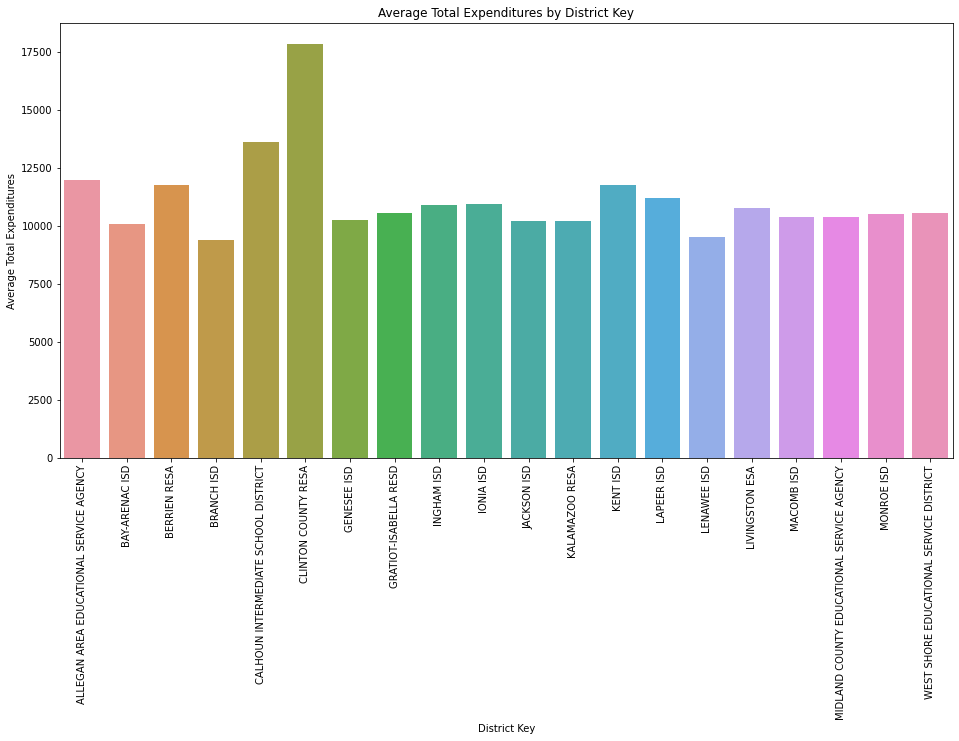

In [ ]:

# create a pivot table to summarize the data
df_pivot = df.pivot_table(index='District_Key', values='Avg_Tot_Exp')

# plot the average total experience by district key
plt.figure(figsize=(16, 8))
sns.barplot(x=df_pivot.index, y='Avg_Tot_Exp', data=df_pivot)
plt.xticks(rotation=90)
plt.title('Average Total Expenditures by District Key')
plt.xlabel('District Key')
plt.ylabel('Average Total Expenditures')
plt.show()


#Total Exp. per pupil

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Load data
df = pd.read_csv('/content/cc_race_20d_U.csv')

# Remove rows with missing latitude or longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create map centered at Michigan
map_michigan_2017 = folium.Map(location=[44.3148, -85.6024], zoom_start=7)
map_michigan_2018 = folium.Map(location=[44.3148, -85.6024], zoom_start=7)

# Add district labels and heat points for Year_End 2017
df_year_end_2017 = df[df['Year_End'] == 2017]
df_grouped_2017 = df_year_end_2017.groupby(['District_Key']).mean().reset_index()

# Create quartiles based on Avg_Tot_Exp
df_grouped_2017['quartiles'] = pd.qcut(df_grouped_2017['Avg_Tot_Exp'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

for index, row in df_grouped_2017.iterrows():
    popup_text = f"{row['District_Key']}<br>Avg_Tot_Exp: {row['Avg_Tot_Exp']}"
    color = {
        'Q1': 'blue',
        'Q2': 'green',
        'Q3': 'orange',
        'Q4': 'red'
    }[row['quartiles']]
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=color, fill=True, fill_opacity=0.7, popup=popup_text).add_to(map_michigan_2017)

# Add district labels and heat points for Year_End 2018
df_year_end_2018 = df[df['Year_End'] == 2018]
df_grouped_2018 = df_year_end_2018.groupby(['District_Key']).mean().reset_index()

# Create quartiles based on Avg_Tot_Exp
df_grouped_2018['quartiles'] = pd.qcut(df_grouped_2018['Avg_Tot_Exp'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

for index, row in df_grouped_2018.iterrows():
    popup_text = f"{row['District_Key']}<br>Avg_Tot_Exp: {row['Avg_Tot_Exp']}"
    color = {
        'Q1': 'blue',
        'Q2': 'green',
        'Q3': 'orange',
        'Q4': 'red'
    }[row['quartiles']]
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=color, fill=True, fill_opacity=0.7, popup=popup_text).add_to(map_michigan_2018)

# Display maps
print("Map for Year_End 2017")
display(map_michigan_2017)

print("Map for Year_End 2018")
display(map_michigan_2018)


Map for Year_End 2017


Map for Year_End 2018


#Percent Proficient

In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Load data
df = pd.read_csv('/content/cc_race_20d.csv')

# Remove rows with missing latitude or longitude values
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create map centered at Michigan
map_michigan_2017 = folium.Map(location=[44.3148, -85.6024], zoom_start=7)
map_michigan_2018 = folium.Map(location=[44.3148, -85.6024], zoom_start=7)

# Add district labels and heat points for Year_End 2017
df_year_end_2017 = df[df['Year_End'] == 2017]
df_grouped_2017 = df_year_end_2017.groupby(['District_Key']).mean().reset_index()

# Create quartiles based on Percent_Proficient
df_grouped_2017['quartiles'] = pd.qcut(df_grouped_2017['Percent_Proficient'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

for index, row in df_grouped_2017.iterrows():
    popup_text = f"{row['District_Key']}<br>Percent_Proficient: {row['Percent_Proficient']}"
    color = {
        'Q1': 'blue',
        'Q2': 'green',
        'Q3': 'orange',
        'Q4': 'red'
    }[row['quartiles']]
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=color, fill=True, fill_opacity=0.7, popup=popup_text).add_to(map_michigan_2017)

# Add district labels and heat points for Year_End 2018
df_year_end_2018 = df[df['Year_End'] == 2018]
df_grouped_2018 = df_year_end_2018.groupby(['District_Key']).mean().reset_index()

# Create quartiles based on Percent_Proficient
df_grouped_2018['quartiles'] = pd.qcut(df_grouped_2018['Percent_Proficient'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

for index, row in df_grouped_2018.iterrows():
    popup_text = f"{row['District_Key']}<br>Percent_Proficient: {row['Percent_Proficient']}"
    color = {
        'Q1': 'blue',
        'Q2': 'green',
        'Q3': 'orange',
        'Q4': 'red'
    }[row['quartiles']]
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=color, fill=True, fill_opacity=0.7, popup=popup_text).add_to(map_michigan_2018)


print("Map for Year_End 2018")
display(map_michigan_2018)


Map for Year_End 2017


Map for Year_End 2018


In [ ]:
import folium

# Create map centered on Michigan
m = folium.Map(location=[44.9438, -85.7596], zoom_start=7)

# Loop through rows of the dataframe
for index, row in df.iterrows():
    # Set color based on urban or rural area
    if row['Area'] == 'Urban':
        color = 'blue'
    else:
        color = 'red'
    # Add circle marker for each district
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Display the map
m


In [ ]:
import folium

import pandas as pd
import folium
from folium.plugins import HeatMapWithTime

# Load data
df = pd.read_csv('/content/cc_d_level_20d_U.csv')

# Create map centered on Michigan
m = folium.Map(location=[44.9438, -85.7596], zoom_start=7)

# Loop through rows of the dataframe
for index, row in df.iterrows():
    # Set color based on urban or rural area
    if row['District_Cat'] == 0:
        color = 'red'
    elif row['District_Cat'] == 1:
        color = 'green'
    else:
        color = 'blue'
    # Add circle marker for each district
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color
    ).add_to(m)

# Display the map
m
